In [243]:
#### Source of data- https://www.kaggle.com/karangadiya/fifa19

In [244]:
####Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline ### to see the figures
import os

import warnings
warnings.filterwarnings('ignore')



UsageError: unrecognized arguments: ### to see the figures


In [ ]:
df=pd.read_csv('FIFA_data.csv') ###reading the dataset
df

In [245]:
df.shape### checking the no of rows and columns in the dataset

(18207, 96)

In [246]:
###checking the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 96 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      18207 non-null  object 
 9   club_logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18207 non-null  object 
 14  Intern

In [247]:
#### checking the no of missing values in each column
df.isnull().sum()

ID             0
Name           0
Age            0
Photo          0
Nationality    0
              ..
Passing        0
Mobility       0
Power          0
Rating         0
Shooting       0
Length: 96, dtype: int64

In [248]:
###listing the names of the columns
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'club_logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

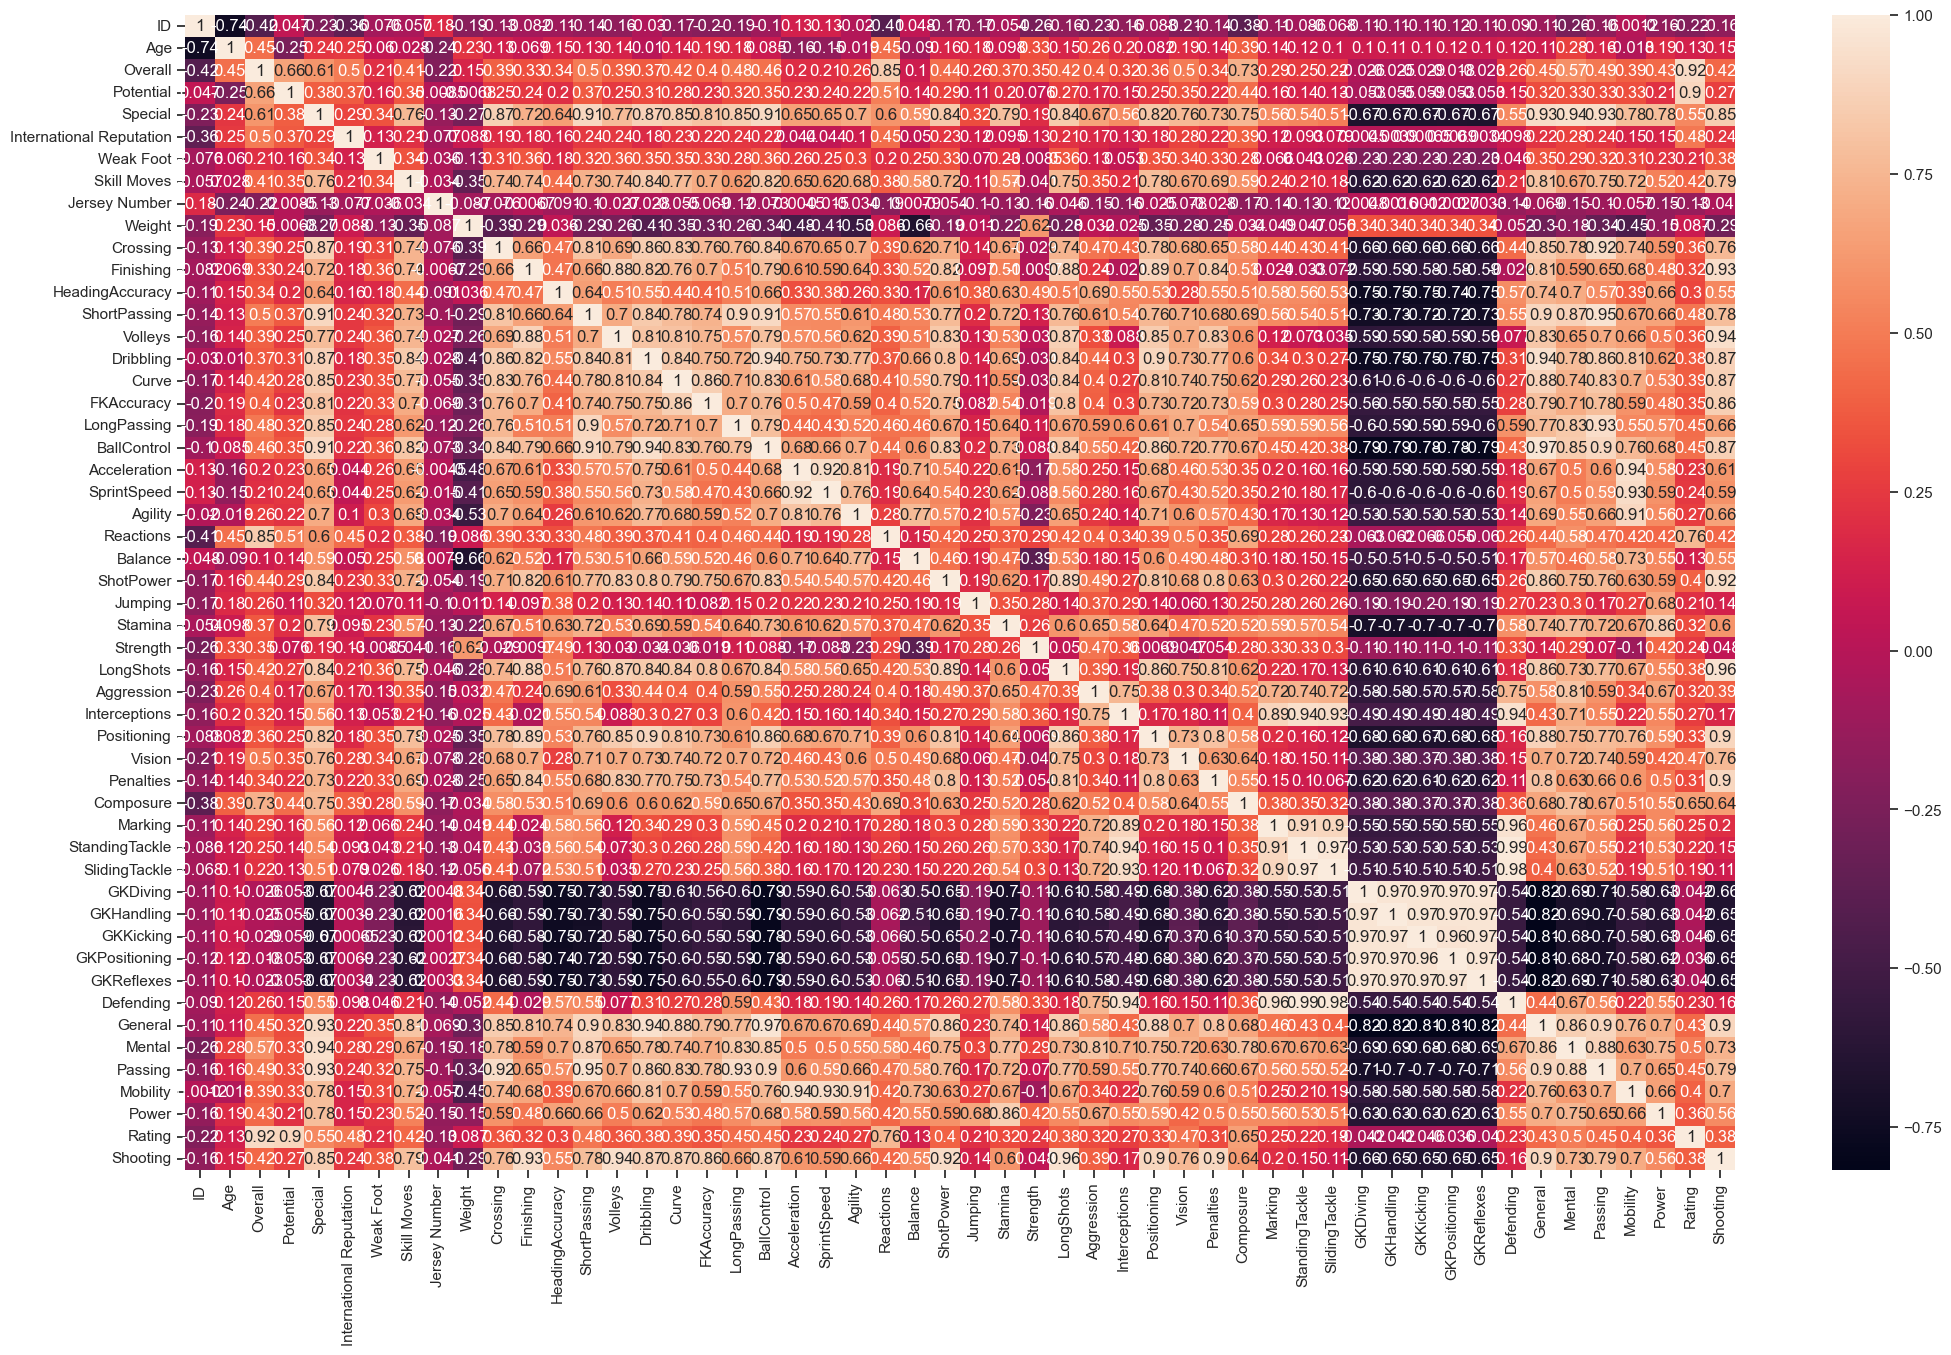

In [249]:
###plotting the heatmap of the correlation matrix
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [250]:
####Analysis on the nationality column
df['Nationality'].value_counts().sort_values(ascending=False).head(10)### top 10 countries in terms of no of players belongs to

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. 

In [251]:
#### we can also see this using word cloud
!pip install wordcloud
from wordcloud import WordCloud  # importing the worldcloud module. Wordcloud uses the text sizes to represent the frequency of the text

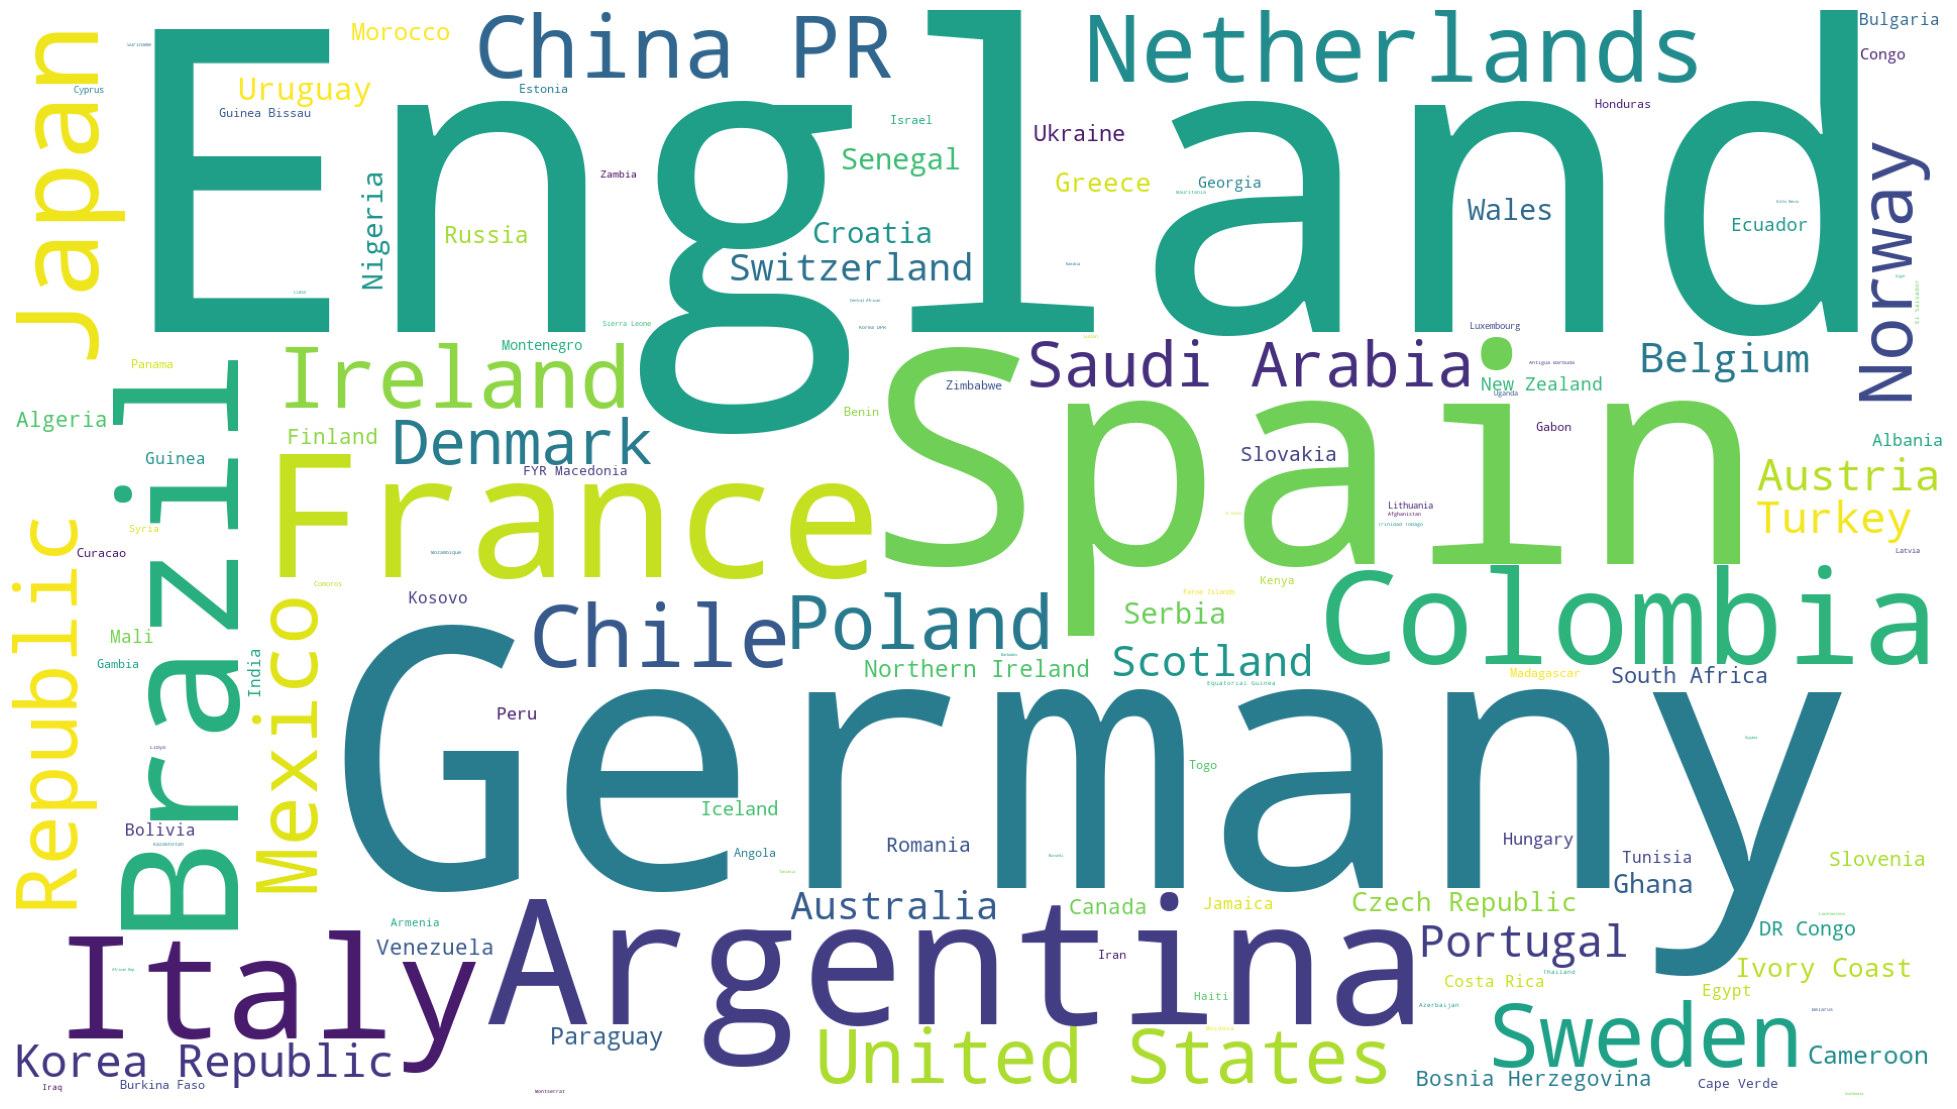

In [252]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud1.png')##savung the wordcloud image
plt.show()

#### Missing value treatment

In [253]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
features_with_na

[]

In [254]:
## calculating % of missing values in each column
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4),'% null values')

In [255]:
df['Club'].value_counts()
df['Club']=df['Club'].fillna('No club')###filling with 'no club'

In [256]:
df['Position'].value_counts()
df['Position']=df['Position'].fillna('ST')###filling with most frequent value

In [257]:
### i will fill the columns with 0.26% null values with mean
# selecting columns to impute the missing values by mean
to_impute_by_mean = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [258]:
for feature in to_impute_by_mean:
    df[feature].fillna(df[feature].mean(),inplace=True)

#### Categorical columns

In [259]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Name',
 'Photo',
 'Nationality',
 'Flag',
 'Club',
 'club_logo',
 'Value',
 'Wage',
 'Preferred Foot',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Release Clause']

In [260]:
'''These are categorical variables and will be imputed by mode.'''
to_impute_by_mode = df.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for feature in to_impute_by_mode.columns:
    df[feature].fillna(df[feature].mode()[0], inplace = True)

In [261]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
to_impute_by_median = df.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in to_impute_by_median.columns:
    df[i].fillna(df[i].median(), inplace = True)

In [262]:
###remaining columns with null values
df.columns[df.isna().any()]

Index([], dtype='object')

In [263]:
'''Filling the remaining missing values with 0'''
df.fillna(0,inplace=True)

In [264]:
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     club_logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  GKReflexes Release Clause  Defending General  Mental  Passing  Mobility  \
0        8.0        €226.5M         29      89      71       87        91   
1       11.0        €127.1M         27      88      73       81        91   
2       11.0        €228.1M         28      85      72       80        94   
3       94.0        €138.6M         16      26      43       39        66   
4       13.0        €196.4M         59      79      81       92        81   

  Power Rating Shooting  
0    74     94       88  
1    83     94       88  
2    69     92       84  
3    54     92       21  
4    76     92       85  

[5 rows x 96 columns]

In [265]:
df['CB']

0        47+2
1        53+3
2        47+3
3           0
4        66+3
         ... 
18202    45+2
18203    32+2
18204    28+2
18205    31+2
18206    47+2
Name: CB, Length: 18207, dtype: object

In [266]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'club_logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

'''We will be creating some new columns on based on mean value of different columns '''


In [267]:
def defending(df): ###for creating new defending column
    return int(round((df[['Marking','StandingTackle','SlidingTackle']].mean()).mean()))####mean of three columns will be 
###data for neww column

def general(df):
    return int(round((df[['Dribbling','HeadingAccuracy','Curve','BallControl']].mean()).mean()))

def mental(df):
    return int(round((df[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()).mean()))

def passing(df):
    return int(round((df[['Crossing','ShortPassing','LongPassing']].mean()).mean()))

def mobility(df):
    return int(round((df[['SprintSpeed', 'Agility', 'Reactions','Acceleration']].mean()).mean()))

def power(df):
    return int(round((df[['Balance', 'Jumping', 'Stamina','Strength']].mean()).mean()))

def rating(df):
    return int((round(df[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [268]:
df.rename(columns={'Club Logo':'club_logo'},inplace=True)

In [269]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'club_logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [270]:
# adding these categories to the data

df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [271]:
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     club_logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  GKReflexes Release Clause  Defending General  Mental  Passing  Mobility  \
0        8.0        €226.5M         29      89      71       87        91   
1       11.0        €127.1M         27      88      73       81        91   
2       11.0        €228.1M         28      85      72       80        94   
3       94.0        €138.6M         16      26      43       39        66   
4       13.0        €196.4M         59      79      81       92        81   

  Power Rating Shooting  
0    74     94       88  
1    83     94       88  
2    69     92       84  
3    54     92       21  
4    76     92       85  

[5 rows x 96 columns]

In [272]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'club_logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [273]:
###Now lets create the players dataset for analaysis
df1=df[['Name','Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power',
       'Rating', 'Shooting','Nationality', 'Flag','Club', 'club_logo','Photo']]
df1.head(10)

Name  Defending  General  Mental  Passing  Mobility  Power  \
0           L. Messi         29       89      71       87        91     74   
1  Cristiano Ronaldo         27       88      73       81        91     83   
2          Neymar Jr         28       85      72       80        94     69   
3             De Gea         16       26      43       39        66     54   
4       K. De Bruyne         59       79      81       92        81     76   
5          E. Hazard         28       83      72       84        92     75   
6          L. Modrić         70       81      80       89        84     77   
7          L. Suárez         48       85      78       74        84     81   
8       Sergio Ramos         90       78      77       74        78     82   
9           J. Oblak         19       14      41       23        64     61   

   Rating  Shooting Nationality                                 Flag  \
0      94        88   Argentina  https://cdn.sofifa.org/flags/52.png   
1      94        88    Portugal  https://cdn.sofifa.org/flags/38.png   
2      92        84      Brazil  https://cdn.sofifa.org/flags/54.png   
3      92        21       Spain  https://cdn.sofifa.org/flags/45.png   
4      92        85     Belgium   https://cdn.sofifa.org/flags/7.png   
5      91        82     Belgium   https://cdn.sofifa.org/flags/7.png   
6      91        78     Croatia  https://cdn.sofifa.org/flags/10.png   
7      91        87     Uruguay  https://cdn.sofifa.org/flags/60.png   
8      91        68       Spain  https://cdn.sofifa.org/flags/45.png   
9      92        14    Slovenia  https://cdn.sofifa.org/flags/44.png   

                  Club                                     club_logo  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png   
5              Chelsea    https://cdn.sofifa.org/teams/2/light/5.png   
6          Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png   
7         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
8          Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png   
9      Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png   

                                            Photo  
0  https://cdn.sofifa.org/players/4/19/158023.png  
1   https://cdn.sofifa.org/players/4/19/20801.png  
2  https://cdn.sofifa.org/players/4/19/190871.png  
3  https://cdn.sofifa.org/players/4/19/193080.png  
4  https://cdn.sofifa.org/players/4/19/192985.png  
5  https://cdn.sofifa.org/players/4/19/183277.png  
6  https://cdn.sofifa.org/players/4/19/177003.png  
7  https://cdn.sofifa.org/players/4/19/176580.png  
8  https://cdn.sofifa.org/players/4/19/155862.png  
9  https://cdn.sofifa.org/players/4/19/200389.png

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


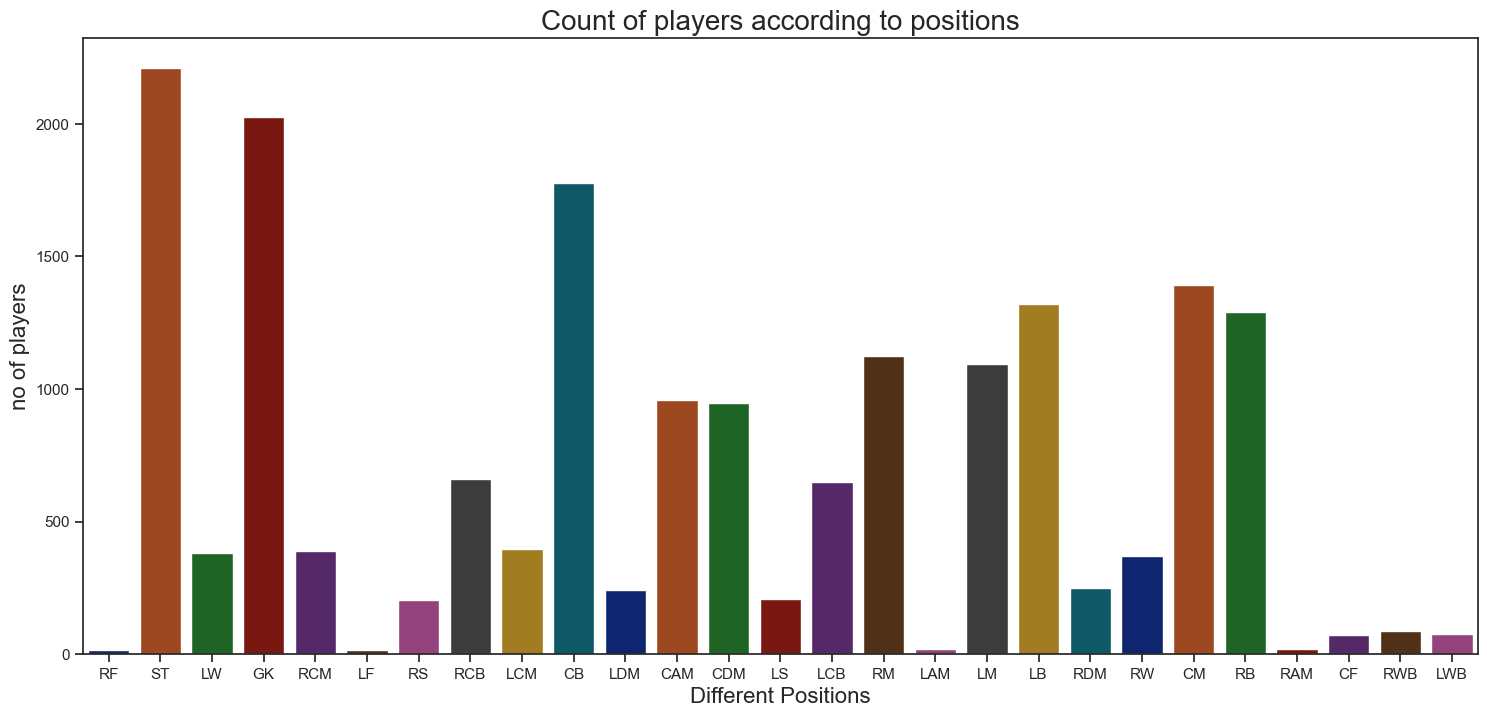

In [274]:
plt.figure(figsize = (18, 8))
sns.countplot(df['Position'],palette='dark')
plt.xlabel('Different Positions',fontsize=16)
plt.ylabel('no of players',fontsize=16)
plt.title('Count of players according to positions',fontsize=20)
plt.show()

In [275]:
df.Height.value_counts() ####Height column

6'0     2929
5'10    2479
5'9     2238
5'11    2159
6'2     2015
6'1     1908
6'3      990
5'8      946
5'7      905
6'4      749
5'6      316
6'5      246
5'5      145
6'6       93
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: Height, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


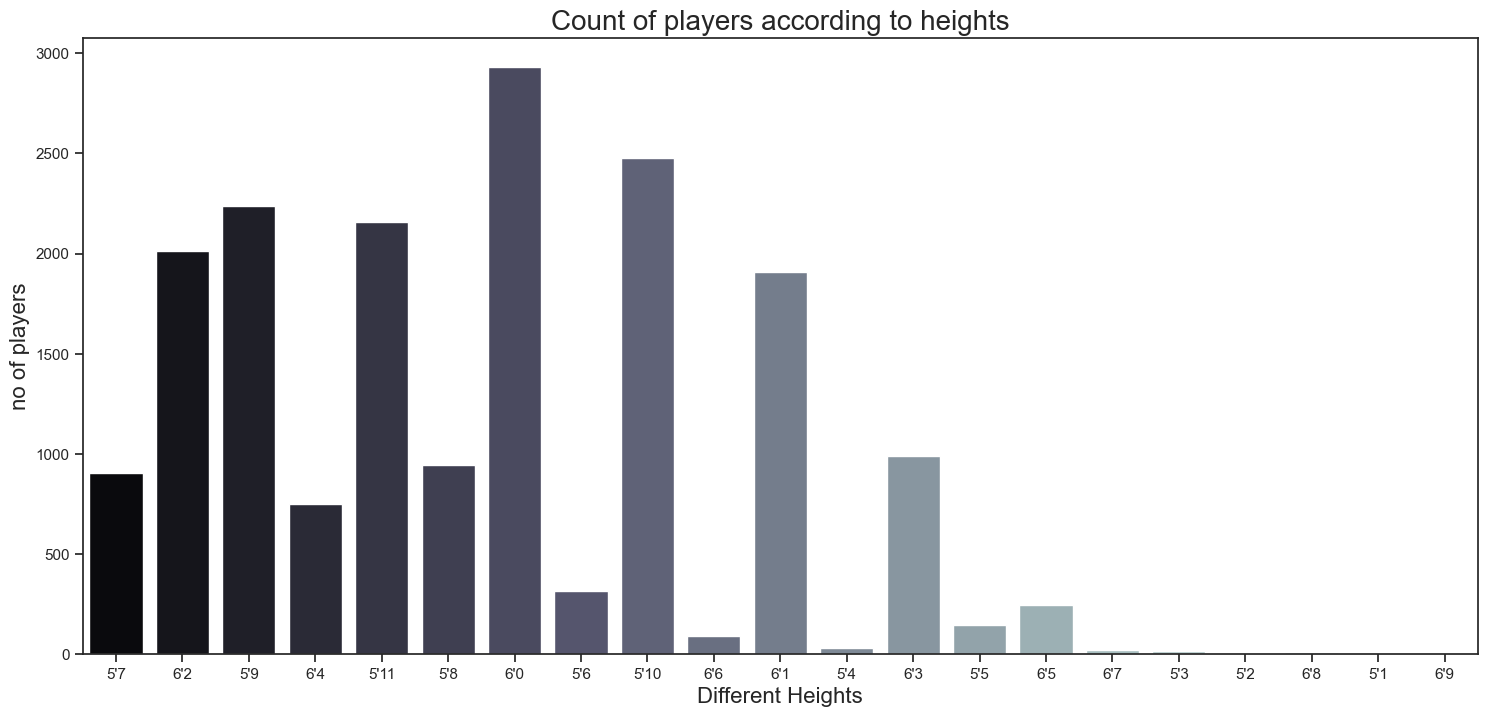

In [276]:
###plotting count of players acc to hweight
plt.figure(figsize = (18, 8))
sns.countplot(df['Height'],palette='bone')
plt.xlabel('Different Heights',fontsize=16)
plt.ylabel('no of players',fontsize=16)
plt.title('Count of players according to heights',fontsize=20)
plt.show()

In [277]:
####Work rate column =====attack work rate/defense work rate
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', 0], dtype=object)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


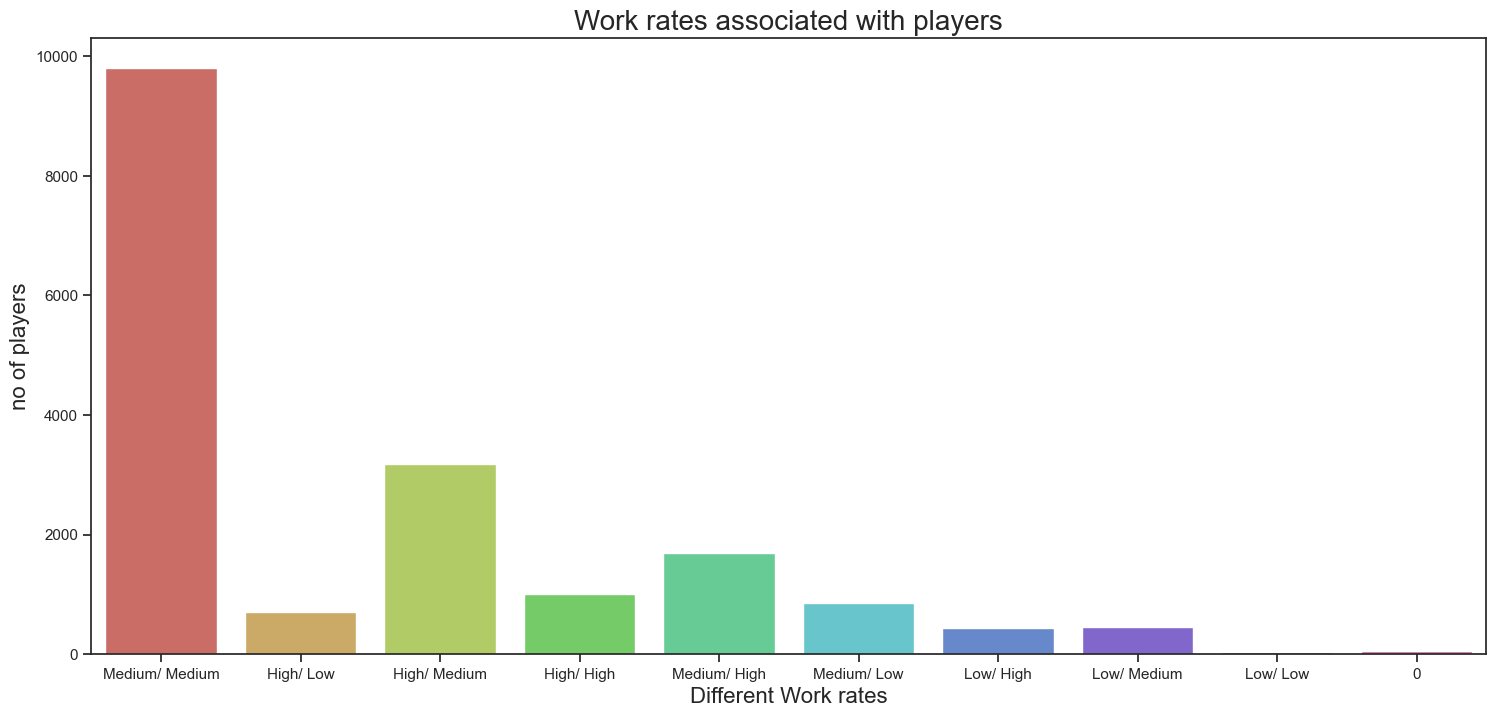

In [278]:
###plotting count of players acc to hweight
plt.figure(figsize = (18, 8))
sns.countplot(df['Work Rate'],palette='hls')
plt.xlabel('Different Work rates',fontsize=16)
plt.ylabel('no of players',fontsize=16)
plt.title('Work rates associated with players',fontsize=20)
plt.show()

In [279]:
df['Special'].value_counts()

1745    47
1728    46
1628    46
1740    42
1655    42
        ..
2127     1
2197     1
2104     1
2151     1
731      1
Name: Special, Length: 1422, dtype: int64

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


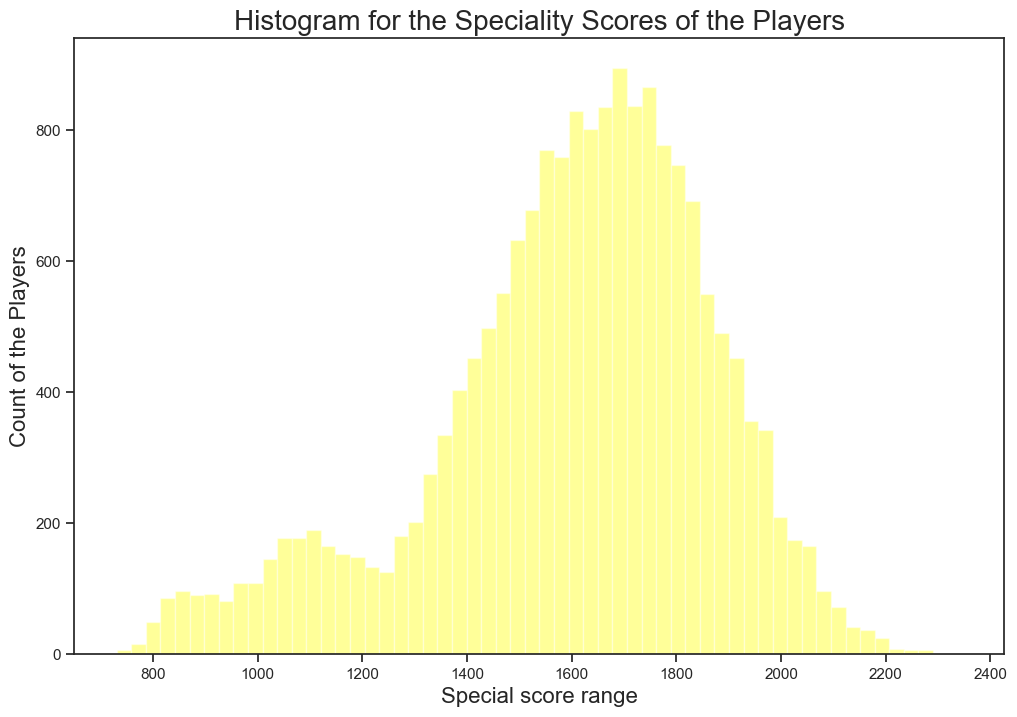

In [280]:
x = df.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'yellow')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

In [281]:
####Overall rating column
df['Overall'].unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46],
      dtype=int64)

In [282]:
df['Nationality'].value_counts().head(10).index

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object')

In [283]:
selected_countries=('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands')


In [284]:
overall_data=df[df['Nationality'].isin(selected_countries) & df['Overall']] ###extracting overall data for selected countries 
overall_data.head()

ID          Name  Age                                           Photo  \
3   193080        De Gea   27  https://cdn.sofifa.org/players/4/19/193080.png   
8   155862  Sergio Ramos   32  https://cdn.sofifa.org/players/4/19/155862.png   
14  215914      N. Kanté   27  https://cdn.sofifa.org/players/4/19/215914.png   
15  211110     P. Dybala   24  https://cdn.sofifa.org/players/4/19/211110.png   
16  202126       H. Kane   24  https://cdn.sofifa.org/players/4/19/202126.png   

   Nationality                                 Flag  Overall  Potential  \
3        Spain  https://cdn.sofifa.org/flags/45.png       91         93   
8        Spain  https://cdn.sofifa.org/flags/45.png       91         91   
14      France  https://cdn.sofifa.org/flags/18.png       89         90   
15   Argentina  https://cdn.sofifa.org/flags/52.png       89         94   
16     England  https://cdn.sofifa.org/flags/14.png       89         91   

                 Club                                     club_logo  ...  \
3   Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
8         Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png  ...   
14            Chelsea    https://cdn.sofifa.org/teams/2/light/5.png  ...   
15           Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
16  Tottenham Hotspur   https://cdn.sofifa.org/teams/2/light/18.png  ...   

   GKReflexes Release Clause  Defending General  Mental  Passing  Mobility  \
3        94.0        €138.6M         16      26      43       39        66   
8        11.0        €104.6M         90      78      77       74        78   
14       10.0        €121.3M         89      66      83       78        84   
15        8.0        €153.5M         21      85      67       81        87   
16       11.0        €160.7M         43      82      75       79        76   

   Power Rating Shooting  
3     54     92       21  
8     82     91       68  
14    85     90       61  
15    76     92       86  
16    80     90       85  

[5 rows x 96 columns]

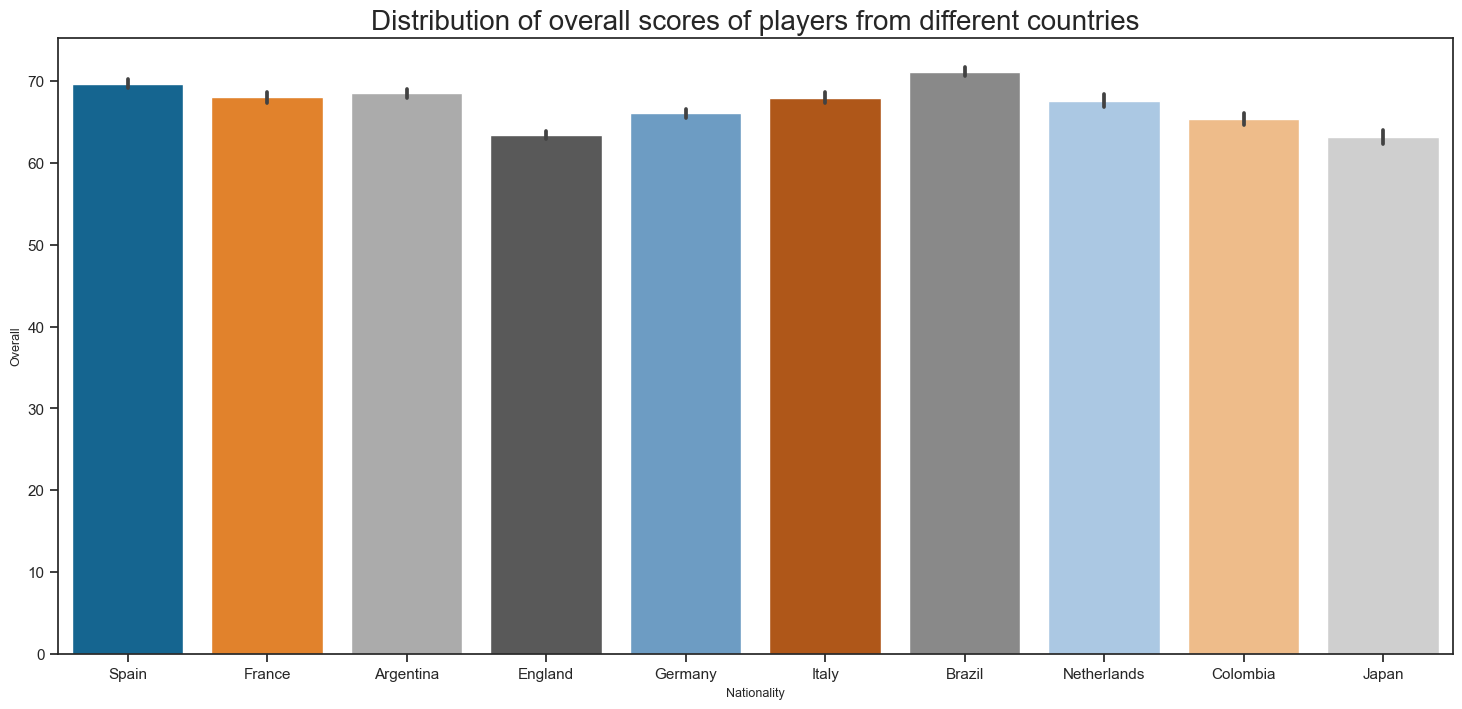

In [285]:
plt.figure(figsize = (18, 8))
plt.xlabel('Countries', fontsize = 9)
plt.ylabel('Overall Scores', fontsize = 9)
plt.title('Distribution of overall scores of players from different countries', fontsize = 20)
sns.barplot(x=overall_data['Nationality'],y=overall_data['Overall'])
plt.show()

In [233]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
sns.set(style="ticks")

In [96]:
selected_clubs=('FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',
       'TSG 1899 Hoffenheim', 'Wolverhampton Wanderers', 'Eintracht Frankfurt',
       'Southampton', 'Valencia CF')


In [99]:
club_data=data[data['Club'].isin(selected_clubs) & data['Overall']]
club_data

Unnamed: 0      ID               Name  Age  \
7               7  176580          L. Suárez   31   
18             18  192448      M. ter Stegen   26   
20             20  189511    Sergio Busquets   29   
42             42  205600          S. Umtiti   24   
49             49  189332         Jordi Alba   29   
...           ...     ...                ...  ...   
16386       16386  243281         O. Younger   18   
16506       16506  233368          R. Harker   18   
16560       16560  229050  O. Buur Rasmussen   20   
17103       17103  240462         M. Howarth   19   
17114       17114  240732          O. Bayode   19   

                                                Photo Nationality  \
7      https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
18     https://cdn.sofifa.org/players/4/19/192448.png     Germany   
20     https://cdn.sofifa.org/players/4/19/189511.png       Spain   
42     https://cdn.sofifa.org/players/4/19/205600.png      France   
49     https://cdn.sofifa.org/players/4/19/189332.png       Spain   
...                                               ...         ...   
16386  https://cdn.sofifa.org/players/4/19/243281.png     England   
16506  https://cdn.sofifa.org/players/4/19/233368.png     England   
16560  https://cdn.sofifa.org/players/4/19/229050.png     Denmark   
17103  https://cdn.sofifa.org/players/4/19/240462.png     England   
17114  https://cdn.sofifa.org/players/4/19/240732.png     England   

                                      Flag  Overall  Potential  \
7      https://cdn.sofifa.org/flags/60.png       91         91   
18     https://cdn.sofifa.org/flags/21.png       89         92   
20     https://cdn.sofifa.org/flags/45.png       89         89   
42     https://cdn.sofifa.org/flags/18.png       87         92   
49     https://cdn.sofifa.org/flags/45.png       87         87   
...                                    ...      ...        ...   
16386  https://cdn.sofifa.org/flags/14.png       57         70   
16506  https://cdn.sofifa.org/flags/14.png       57         75   
16560  https://cdn.sofifa.org/flags/13.png       57         71   
17103  https://cdn.sofifa.org/flags/14.png       55         65   
17114  https://cdn.sofifa.org/flags/14.png       55         63   

                          Club  ... GKReflexes Release Clause Defending  \
7                 FC Barcelona  ...       37.0          €164M        48   
18                FC Barcelona  ...       90.0        €123.3M        16   
20                FC Barcelona  ...       13.0        €105.6M        85   
42                FC Barcelona  ...       15.0        €121.1M        88   
49                FC Barcelona  ...       13.0         €77.9M        80   
...                        ...  ...        ...            ...       ...   
16386                  Burnley  ...       14.0          €404K        60   
16506                  Burnley  ...       13.0          €556K        19   
16560  Wolverhampton Wanderers  ...        6.0          €505K        52   
17103                  Burnley  ...       11.0          €294K        43   
17114                  Burnley  ...       10.0          €273K        46   

       General Mental  Passing  Mobility  Power Rating Shooting  
7           85     78       74        84     81     91       87  
18          16     43       31        52     59     90       16  
20          76     85       78        64     70     89       59  
42          74     73       74        74     79     90       67  
49          78     77       82        90     80     87       64  
...        ...    ...      ...       ...    ...    ...      ...  
16386       37     44       33        45     54     64       36  
16506       48     43       38        60     56     66       51  
16560       48     49       52        69     60     64       33  
17103       54     49       55        60     62     60       48  
17114       50     46       45        66     64     59       40  

[149 rows x 97 columns]

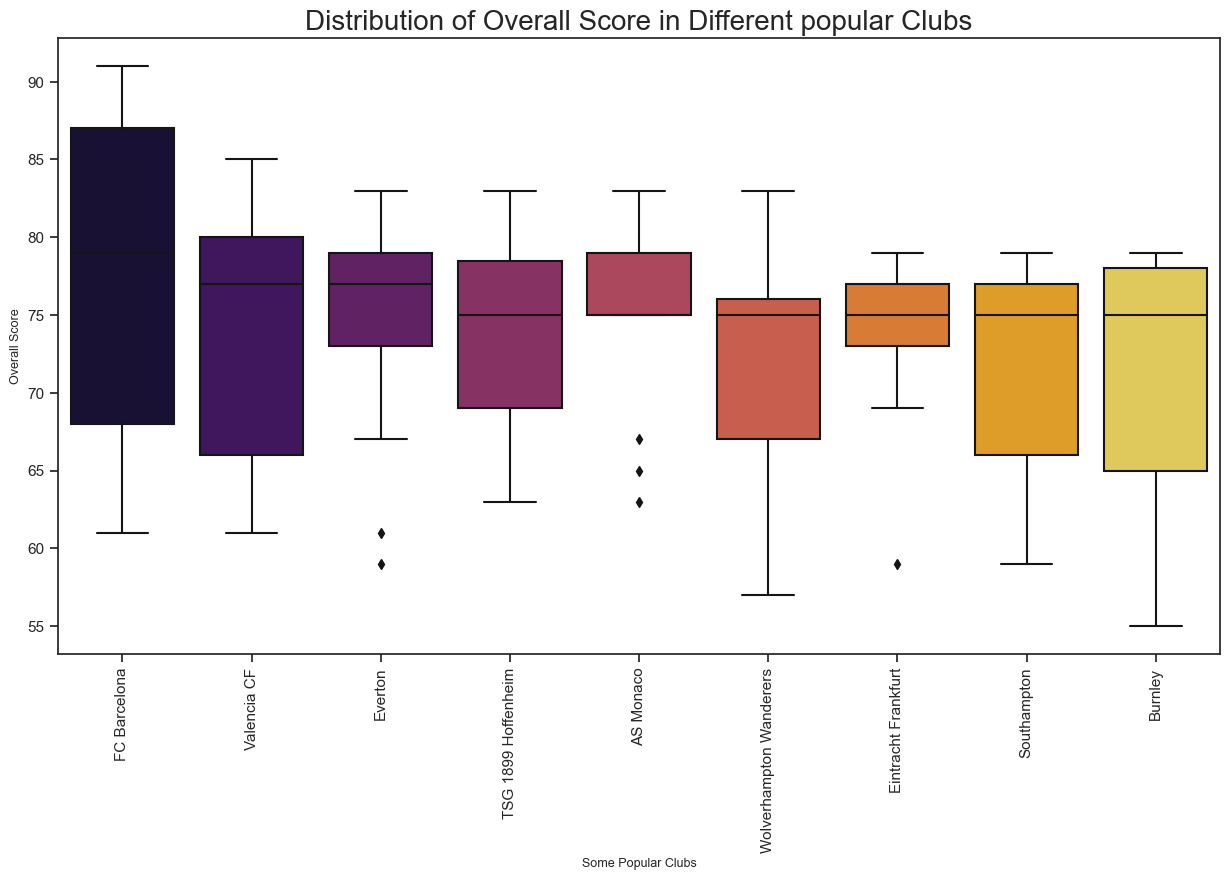

In [110]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = club_data['Club'], y = club_data['Overall'], palette = 'inferno') # creating a boxplot
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [179]:
####finding out to 10 left footers
left_footers=data[data['Preferred Foot']=='Left'][['Name','Age','Club','Nationality']].head(10)
left_footers

Name  Age               Club Nationality
0       L. Messi   31       FC Barcelona   Argentina
13   David Silva   32    Manchester City       Spain
15     P. Dybala   24           Juventus   Argentina
17  A. Griezmann   27    Atlético Madrid      France
19   T. Courtois   26        Real Madrid     Belgium
24  G. Chiellini   33           Juventus       Italy
26      M. Salah   26          Liverpool       Egypt
28  J. Rodríguez   26  FC Bayern München    Colombia
35       Marcelo   30        Real Madrid      Brazil
36       G. Bale   28        Real Madrid       Wales

In [117]:
# finding out the top 10 Right footed footballers

right_footers = data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)
right_footers.head(10)

Name  Age                 Club Nationality
1   Cristiano Ronaldo   33             Juventus    Portugal
2           Neymar Jr   26  Paris Saint-Germain      Brazil
3              De Gea   27    Manchester United       Spain
4        K. De Bruyne   27      Manchester City     Belgium
5           E. Hazard   27              Chelsea     Belgium
6           L. Modrić   32          Real Madrid     Croatia
7           L. Suárez   31         FC Barcelona     Uruguay
8        Sergio Ramos   32          Real Madrid       Spain
9            J. Oblak   25      Atlético Madrid    Slovenia
10     R. Lewandowski   29    FC Bayern München      Poland

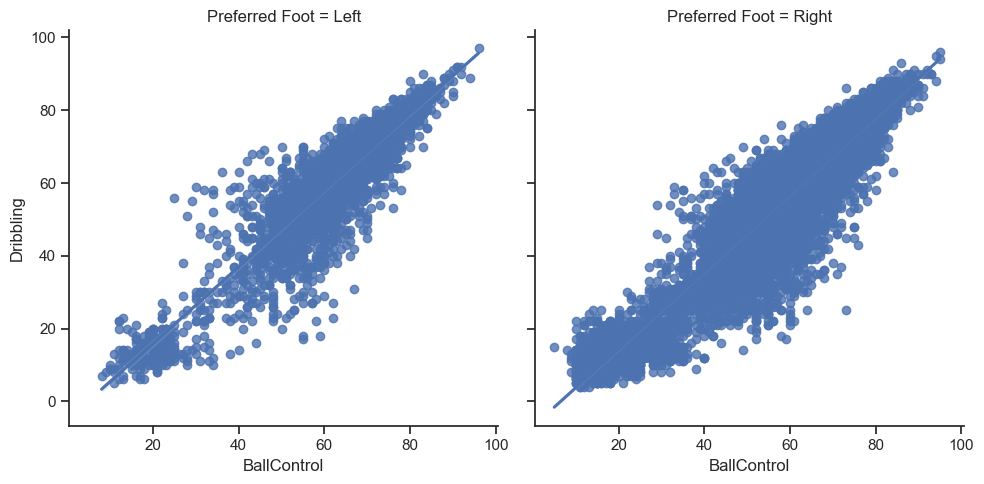

In [118]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

In [122]:
data.groupby('Club')['Nationality'].nunique().sort_values(ascending=False).head(10)   # checking the clubs where players from the most number of nations play

Club
No club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
West Ham United           18
Empoli                    18
AS Monaco                 18
Eintracht Frankfurt       18
Lazio                     18
Napoli                    18
Name: Nationality, dtype: int64

In [123]:
data.groupby('Club')['Nationality'].nunique().sort_values(ascending = True).head(10) # checking the clubs where players from the least number of nations play

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [124]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) # dropping the unnamed column

In [125]:
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     club_logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  GKReflexes Release Clause  Defending General  Mental  Passing  Mobility  \
0        8.0        €226.5M         29      89      71       87        91   
1       11.0        €127.1M         27      88      73       81        91   
2       11.0        €228.1M         28      85      72       80        94   
3       94.0        €138.6M         16      26      43       39        66   
4       13.0        €196.4M         59      79      81       92        81   

  Power Rating Shooting  
0    74     94       88  
1    83     94       88  
2    69     92       84  
3    54     92       21  
4    76     92       85  

[5 rows x 96 columns]

In [126]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'club_logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [135]:
#Player with maximum Potential and Overall Performance
player = str(df.loc[df['Potential'].idxmax()][1])
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [136]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'club_logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [137]:
# finding the best players for each performance criteria
skillset=[ 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [148]:
i=0
while i < len(skillset):
    print('Best {0} : {1}'.format(skillset[i],df.loc[df[skillset[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [159]:
# creating a list of best players in each of the pr_cols criteria
i=0
best_players = []
while i < len(skillset):
    best_players.append(df.loc[df[skillset[i]].idxmax()][1])
    i +=1

In [160]:
best_players

['K. De Bruyne',
 'L. Messi',
 'Naldo',
 'L. Modrić',
 'E. Cavani',
 'L. Messi',
 'Quaresma',
 'L. Messi',
 'T. Kroos',
 'L. Messi',
 'Douglas Costa',
 'K. Mbappé',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernard',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'N. Kanté',
 'A. Akinfenwa',
 'L. Messi',
 'B. Pearson',
 'N. Kanté',
 'Cristiano Ronaldo',
 'L. Messi',
 'M. Balotelli',
 'L. Messi',
 'A. Barzagli',
 'G. Chiellini',
 'Sergio Ramos',
 'De Gea',
 'J. Oblak',
 'M. Neuer',
 'G. Buffon',
 'De Gea']

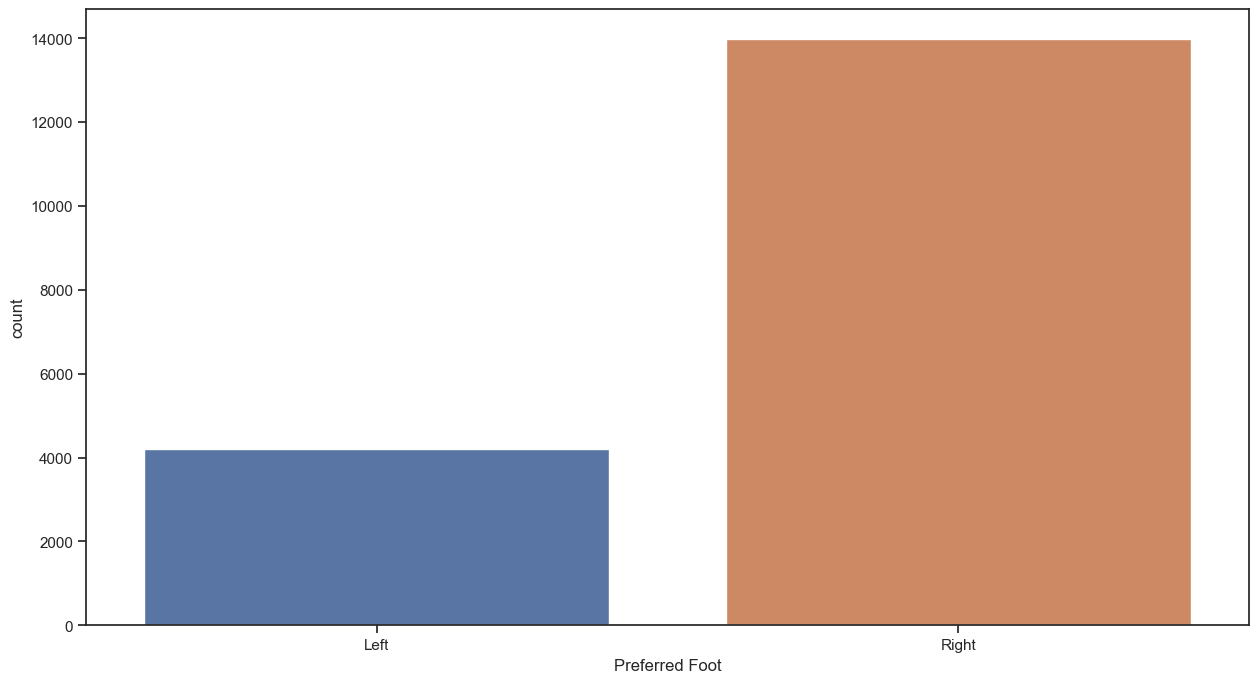

In [167]:
# Plot to show the preferred foot choice of different players
sns.countplot(df['Preferred Foot'])
plt.show()

In [173]:
df.head(20)

ID               Name  Age  \
0   158023           L. Messi   31   
1    20801  Cristiano Ronaldo   33   
2   190871          Neymar Jr   26   
3   193080             De Gea   27   
4   192985       K. De Bruyne   27   
5   183277          E. Hazard   27   
6   177003          L. Modrić   32   
7   176580          L. Suárez   31   
8   155862       Sergio Ramos   32   
9   200389           J. Oblak   25   
10  188545     R. Lewandowski   29   
11  182521           T. Kroos   28   
12  182493           D. Godín   32   
13  168542        David Silva   32   
14  215914           N. Kanté   27   
15  211110          P. Dybala   24   
16  202126            H. Kane   24   
17  194765       A. Griezmann   27   
18  192448      M. ter Stegen   26   
19  192119        T. Courtois   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9   https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   
10  https://cdn.sofifa.org/players/4/19/188545.png      Poland   
11  https://cdn.sofifa.org/players/4/19/182521.png     Germany   
12  https://cdn.sofifa.org/players/4/19/182493.png     Uruguay   
13  https://cdn.sofifa.org/players/4/19/168542.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
15  https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   
17  https://cdn.sofifa.org/players/4/19/194765.png      France   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
19  https://cdn.sofifa.org/players/4/19/192119.png     Belgium   

                                   Flag  Overall  Potential  \
0   https://cdn.sofifa.org/flags/52.png       94         94   
1   https://cdn.sofifa.org/flags/38.png       94         94   
2   https://cdn.sofifa.org/flags/54.png       92         93   
3   https://cdn.sofifa.org/flags/45.png       91         93   
4    https://cdn.sofifa.org/flags/7.png       91         92   
5    https://cdn.sofifa.org/flags/7.png       91         91   
6   https://cdn.sofifa.org/flags/10.png       91         91   
7   https://cdn.sofifa.org/flags/60.png       91         91   
8   https://cdn.sofifa.org/flags/45.png       91         91   
9   https://cdn.sofifa.org/flags/44.png       90         93   
10  https://cdn.sofifa.org/flags/37.png       90         90   
11  https://cdn.sofifa.org/flags/21.png       90         90   
12  https://cdn.sofifa.org/flags/60.png       90         90   
13  https://cdn.sofifa.org/flags/45.png       90         90   
14  https://cdn.sofifa.org/flags/18.png       89         90   
15  https://cdn.sofifa.org/flags/52.png       89         94   
16  https://cdn.sofifa.org/flags/14.png       89         91   
17  https://cdn.sofifa.org/flags/18.png       89         90   
18  https://cdn.sofifa.org/flags/21.png       89         92   
19   https://cdn.sofifa.org/flags/7.png       89         90   

                   Club                                     club_logo  ...  \
0          FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1              Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2   Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3     Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4       Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   
5               Chelsea    htt

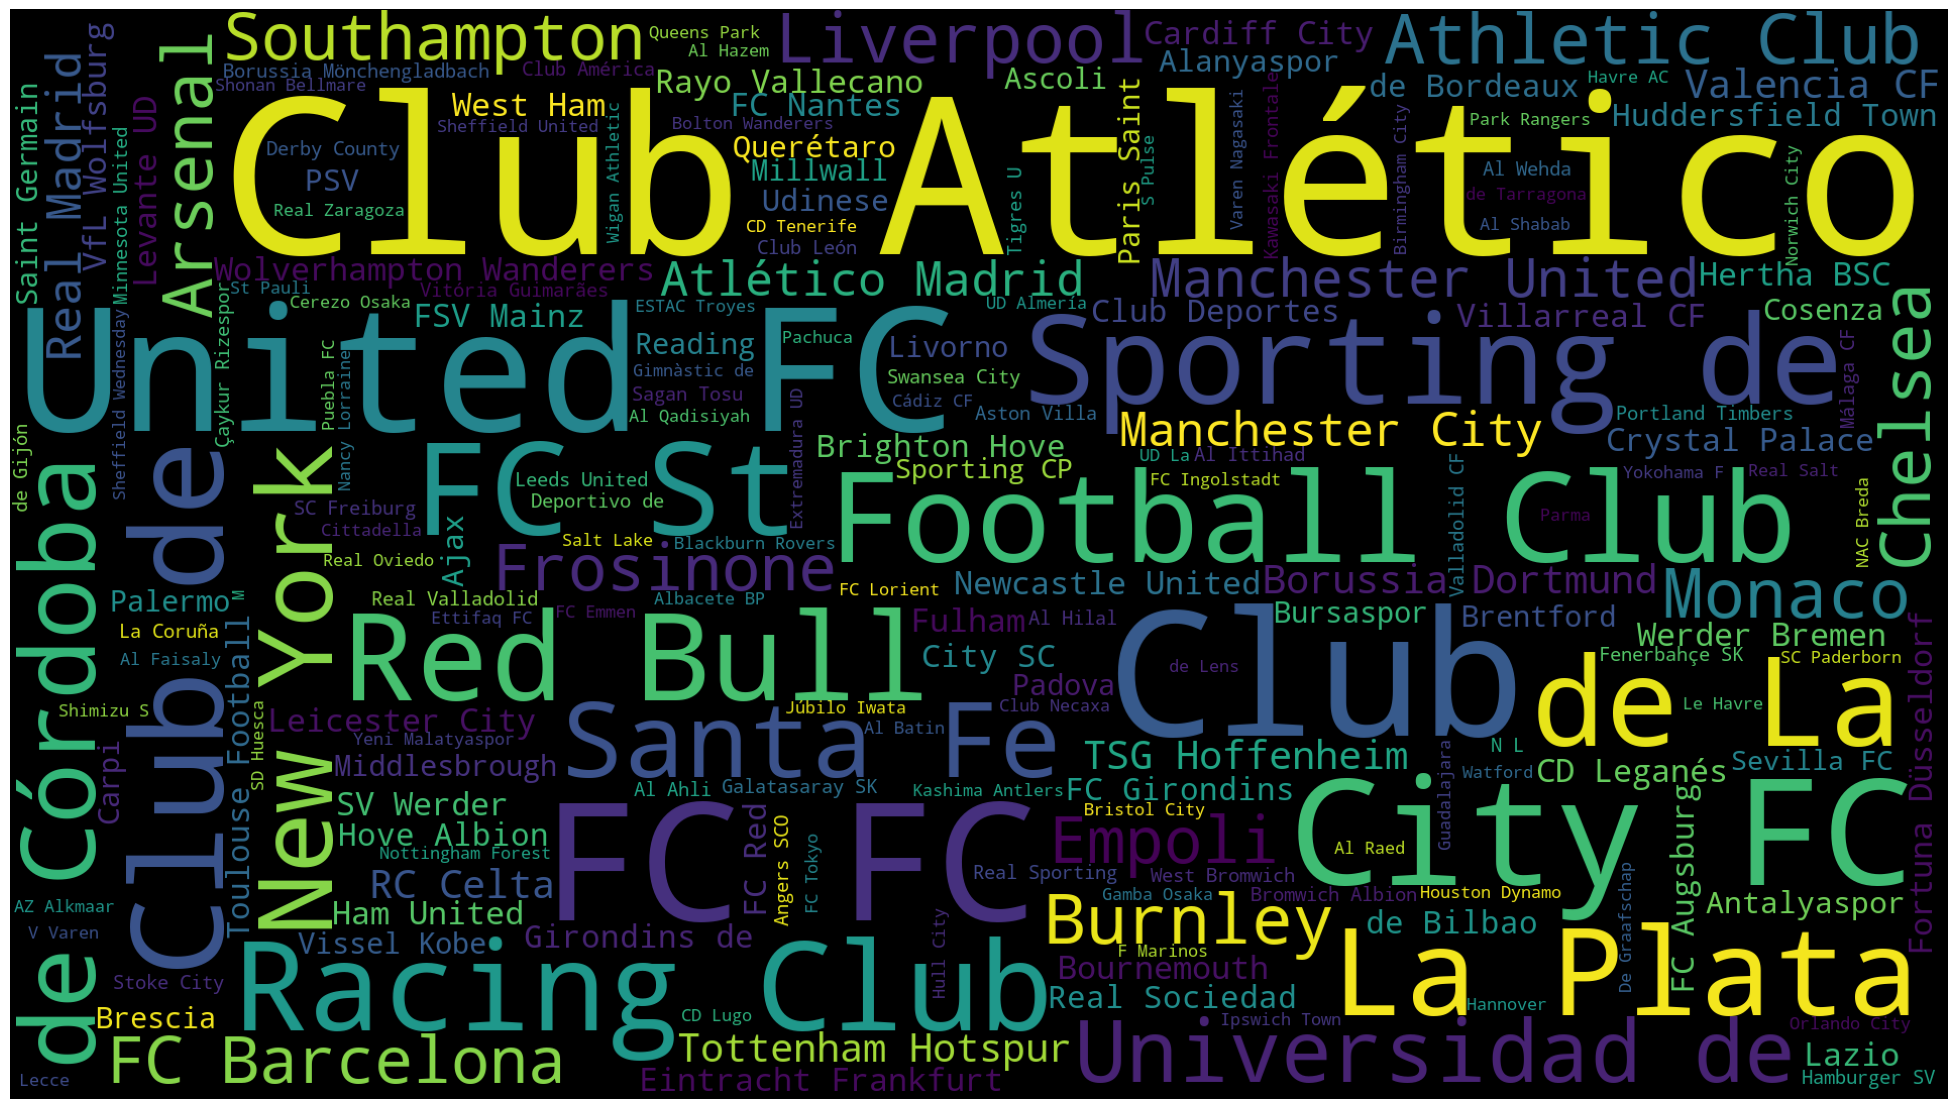

In [175]:
# checking which clubs have been mentioned the most
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players1.png')
plt.show()

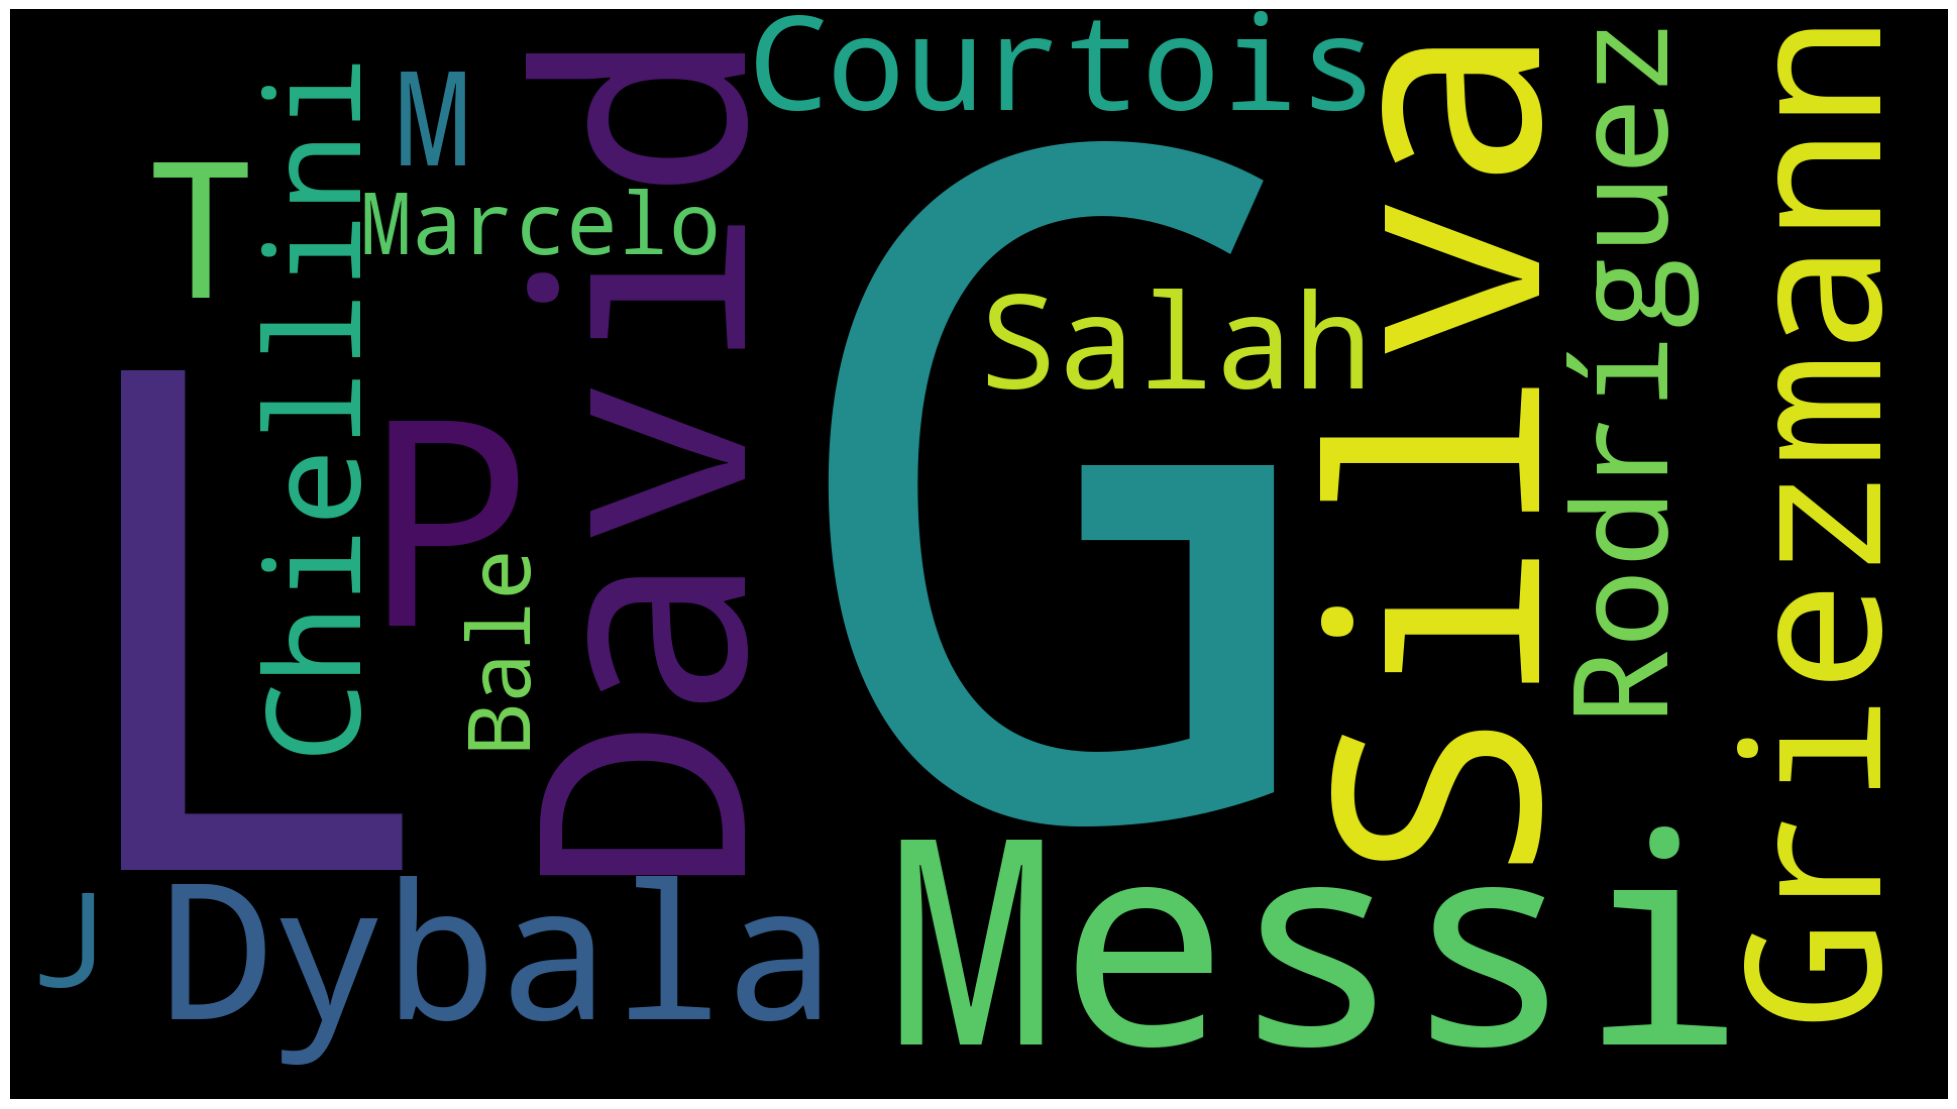

In [182]:
#### showing the name of the players from left footers
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(background_color='black',
                          width=1920,
                          height=1080).generate(" ".join(left_footers['Name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players2.png')
plt.show()

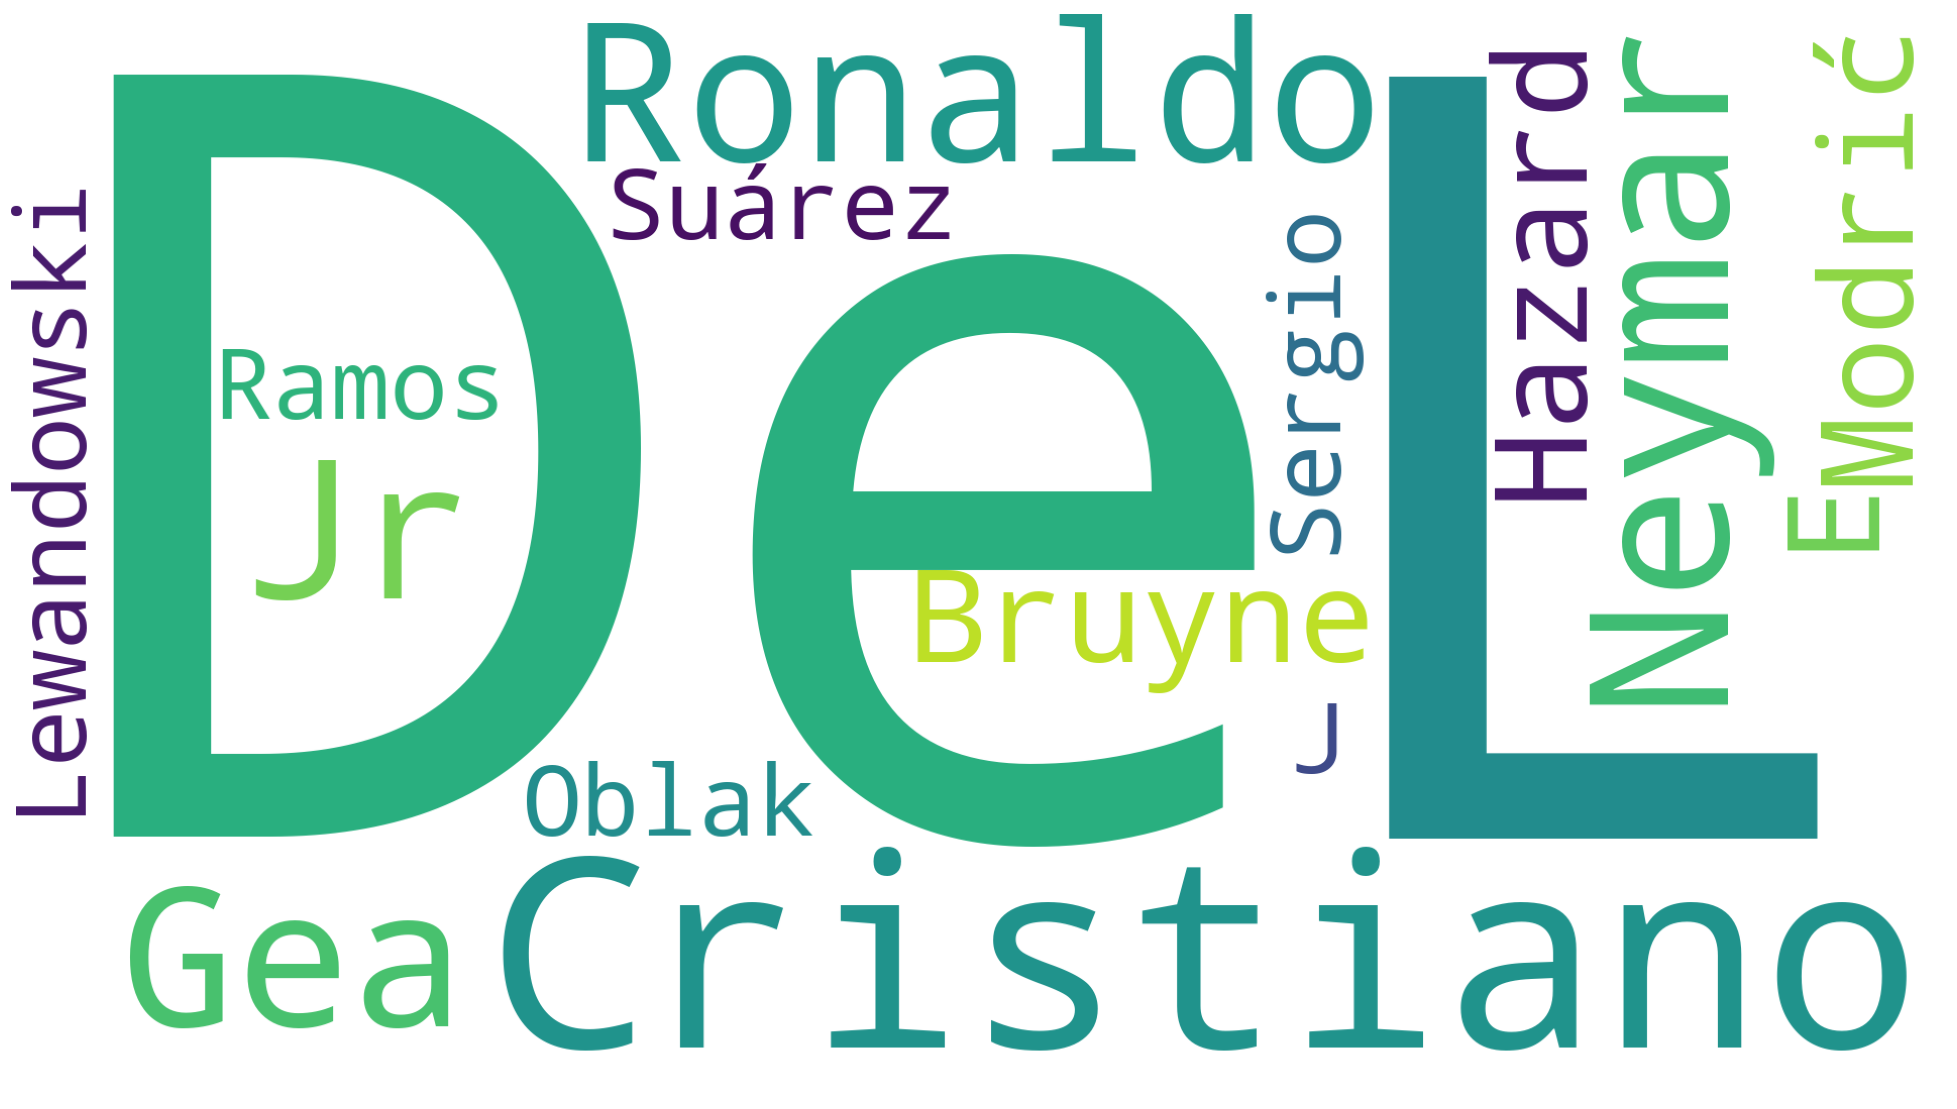

In [185]:
# showing the name of the players which occurs the most number of times(right join)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(right_footers['Name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

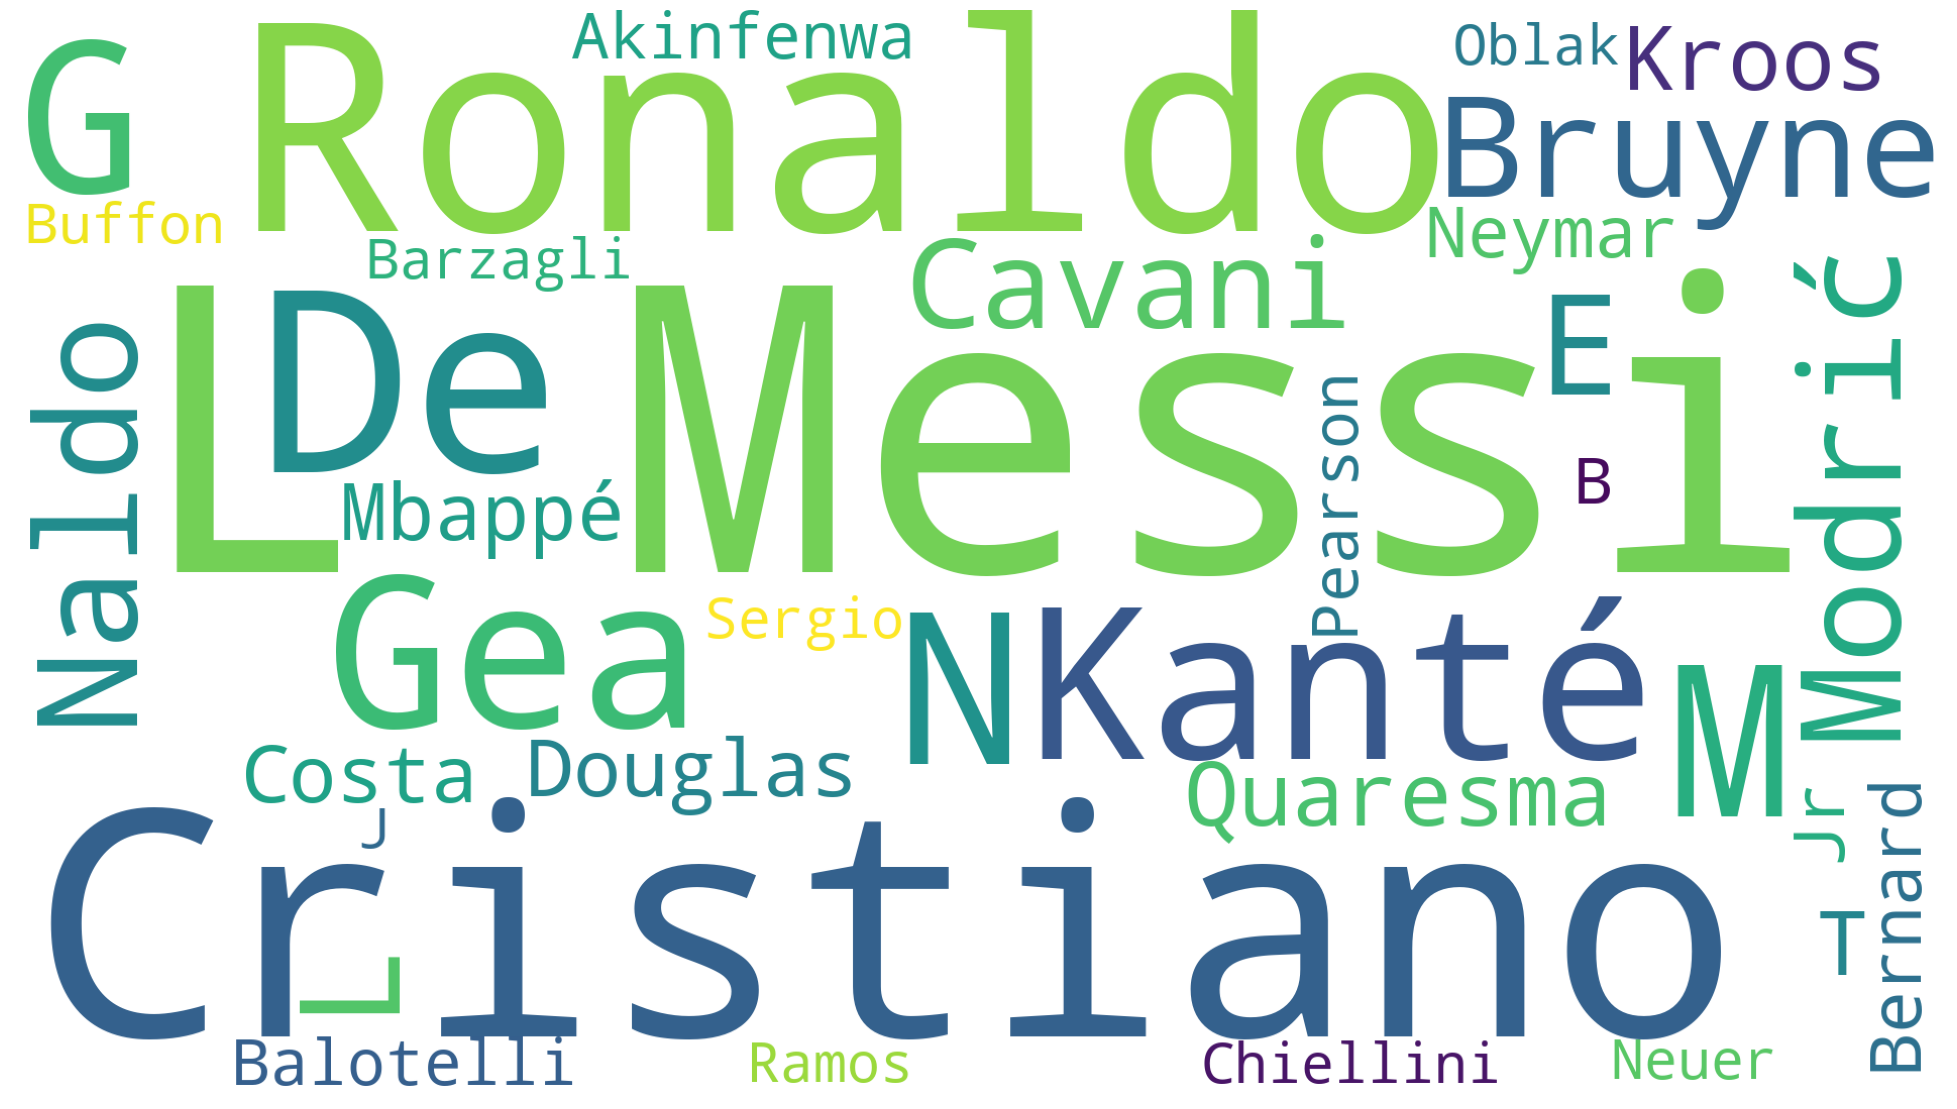

In [188]:
# Checking which player has been mentioned the most in the 'best' list that we have prepared
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(best_players))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()